In [284]:
import pandas as pd
import numpy as np

In [285]:
# crime_seoul= pd.read_csv('../csv-data/crime_seoul.csv',  encoding='CP949')

In [286]:
crime_seoul= pd.read_csv('../csv-data/crime_seoul_2.csv', encoding='utf-8')

In [287]:
crime_seoul.head()

,구별,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,Unnamed: 11
0,중구,2,2,3,2,105,65,"1,395",477,"1,355","1,170",NaN
1,종로구,3,3,6,5,115,98,"1,070",413,"1,278","1,070",NaN
2,중구,1,0,6,4,65,46,"1,153",382,869,794,NaN
3,서대문구,2,2,5,4,154,124,"1,812",738,"2,056","1,711",NaN
4,종로구,3,2,5,4,96,63,"1,114",424,"1,015",861,NaN


In [288]:
# 10개 이상

In [289]:
crime_seoul.drop('Unnamed: 11', axis=1, inplace=True) #의미 없는 'Unnamed: 11'컬럼 삭제
crime_seoul.head()

,구별,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중구,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로구,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,중구,1,0,6,4,65,46,"1,153",382,869,794
3,서대문구,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,종로구,3,2,5,4,96,63,"1,114",424,"1,015",861


In [290]:
crime_seoul.set_index('구별', inplace=True) #인덱스를 '구별'로 설정
crime_seoul.head()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,
중구,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
종로구,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
중구,1,0,6,4,65,46,"1,153",382,869,794
서대문구,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
종로구,3,2,5,4,96,63,"1,114",424,"1,015",861


In [291]:
for i in range(len(crime_seoul)):
    num_list=crime_seoul['절도 발생'][i].split(',')
    str=''
    for x in num_list:
        str+=x
    crime_seoul['절도 발생'][i]=int(str)
    
    num_list=crime_seoul['절도 검거'][i].split(',')
    str=''
    for x in num_list:
        str+=x
    crime_seoul['절도 검거'][i]=int(str)
    
    num_list=crime_seoul['폭력 발생'][i].split(',')
    str=''
    for x in num_list:
        str+=x
    crime_seoul['폭력 발생'][i]=int(str)
    
    num_list=crime_seoul['폭력 검거'][i].split(',')
    str=''
    for x in num_list:
        str+=x
    crime_seoul['폭력 검거'][i]=int(str)
# 숫자 자리수 구분기호(,) 삭제

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingW

In [292]:
crime_seoul.head() #콤마 삭제 확인

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
구별,,,,,,,,,,
중구,2,2,3,2,105,65,1395,477,1355,1170
종로구,3,3,6,5,115,98,1070,413,1278,1070
중구,1,0,6,4,65,46,1153,382,869,794
서대문구,2,2,5,4,154,124,1812,738,2056,1711
종로구,3,2,5,4,96,63,1114,424,1015,861


In [293]:
crime_seoul[['절도 발생', '절도 검거', '폭력 발생', '폭력 검거']] = crime_seoul[['절도 발생', '절도 검거', '폭력 발생', '폭력 검거']].apply(pd.to_numeric)
#dtype을 object에서 int64로 변경

In [294]:
crime_seoul.dtypes

살인 발생    int64
살인 검거    int64
강도 발생    int64
강도 검거    int64
강간 발생    int64
강간 검거    int64
절도 발생    int64
절도 검거    int64
폭력 발생    int64
폭력 검거    int64
dtype: object

In [295]:
crime_seoul=pd.pivot_table(crime_seoul, index='구별', aggfunc=np.sum)
#구별 기준으로 컬럼값 합치기

In [296]:
import seaborn as sns

In [297]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [298]:
crime_seoul.corr()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
강간 검거,1.000000,0.901667,0.561628,0.667607,0.446956,0.563282,0.776107,0.760049,0.701723,0.693321
강간 발생,0.901667,1.000000,0.414577,0.617927,0.490557,0.630405,0.714217,0.746281,0.667269,0.670667
강도 검거,0.561628,0.414577,1.000000,0.804728,0.370033,0.411281,0.522370,0.493012,0.501055,0.508042
강도 발생,0.667607,0.617927,0.804728,1.000000,0.601902,0.674517,0.527231,0.574428,0.697531,0.690986
살인 검거,0.446956,0.490557,0.370033,0.601902,1.000000,0.954009,0.405615,0.478562,0.716727,0.718787
살인 발생,0.563282,0.630405,0.411281,0.674517,0.954009,1.000000,0.500929,0.623768,0.767003,0.768140
절도 검거,0.776107,0.714217,0.522370,0.527231,0.405615,0.500929,1.000000,0.834168,0.754149,0.735048
절도 발생,0.760049,0.746281,0.493012,0.574428,0.478562,0.623768,0.834168,1.000000,0.798121,0.804446
폭력 검거,0.701723,0.667269,0.501055,0.697531,0.716727,0.767003,0.754149,0.798121,1.000000,0.992899
폭력 발생,0.693321,0.670667,0.508042,0.690986,0.718787,0.768140,0.735048,0.804446,0.992899,1.000000


In [299]:
corr= crime_seoul.corr()
cols = ['강간 검거', '강간 발생', '강도 검거', '강도 발생', '살인 검거', '살인 발생', '절도 검거', '절도 발생',
       '폭력 검거', '폭력 발생']

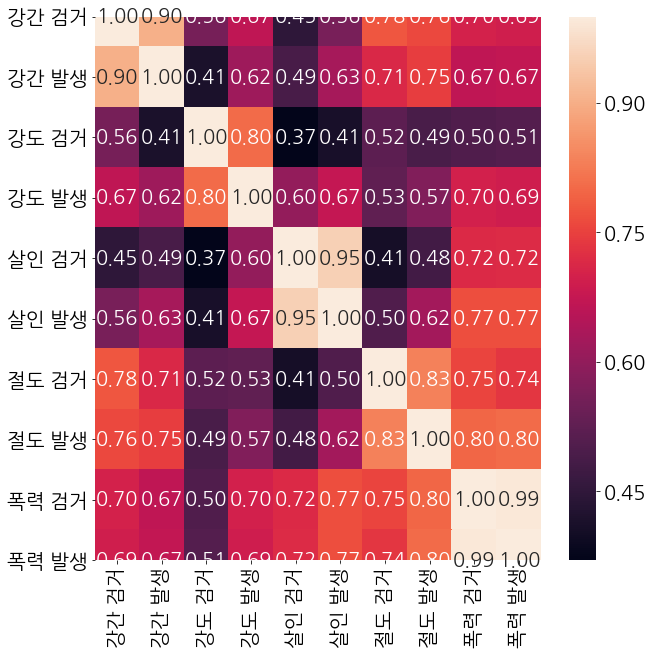

In [300]:
sns.heatmap(corr.values,
            cbar = True,
            annot= True,
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols
           )
#각 컬럼간의 상관계수

In [301]:
crime_seoul['강간 검거율']=crime_seoul['강간 검거']/crime_seoul['강간 발생']*100

In [302]:
crime_seoul['강도 검거율']=crime_seoul['강도 검거']/crime_seoul['강도 발생']*100

In [303]:
crime_seoul['살인 검거율']=crime_seoul['살인 검거']/crime_seoul['살인 발생']*100

In [304]:
crime_seoul['절도 검거율']=crime_seoul['살인 검거']/crime_seoul['살인 발생']*100

In [305]:
crime_seoul['폭력 검거율']=crime_seoul['살인 검거']/crime_seoul['살인 발생']*100

In [306]:
#검거율 컬럼을 추가

In [307]:
crime_seoul.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간 검거율,강도 검거율,살인 검거율,절도 검거율,폭력 검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,76.923077,76.923077
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,75.000000,75.000000
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,114.285714,114.285714
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,114.285714,114.285714
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,88.888889,88.888889


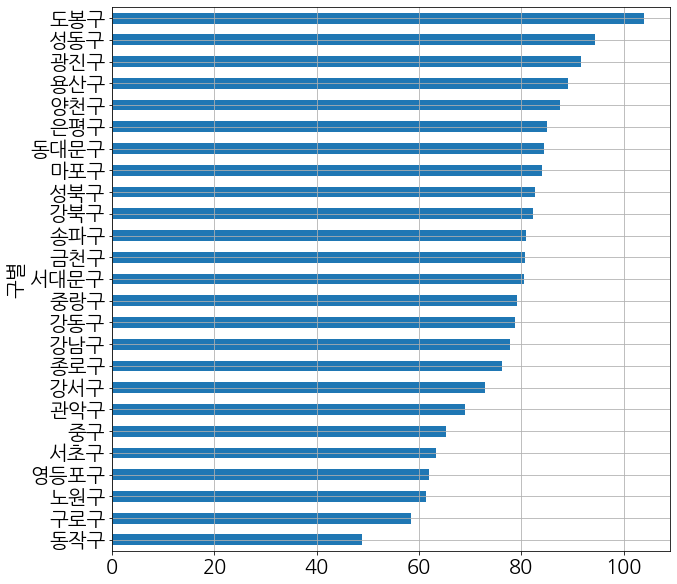

In [308]:
crime_seoul['강간 검거율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
#구별 강간 검거율 순위

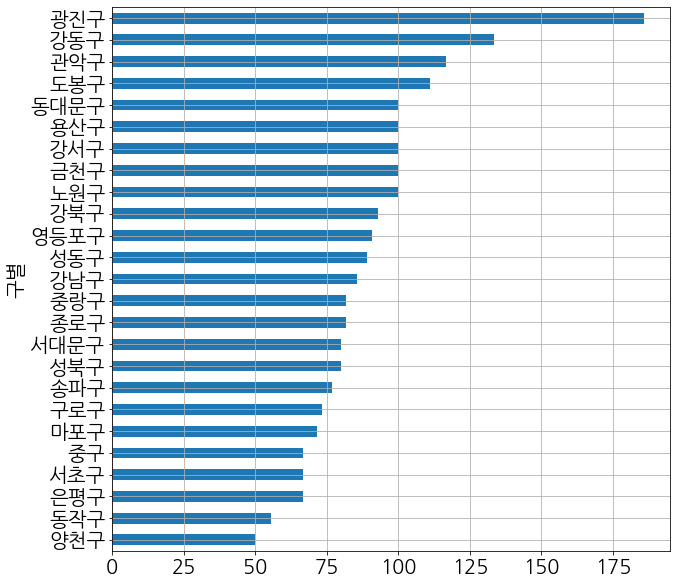

In [309]:
crime_seoul['강도 검거율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
#구별 강도 검거율 순위

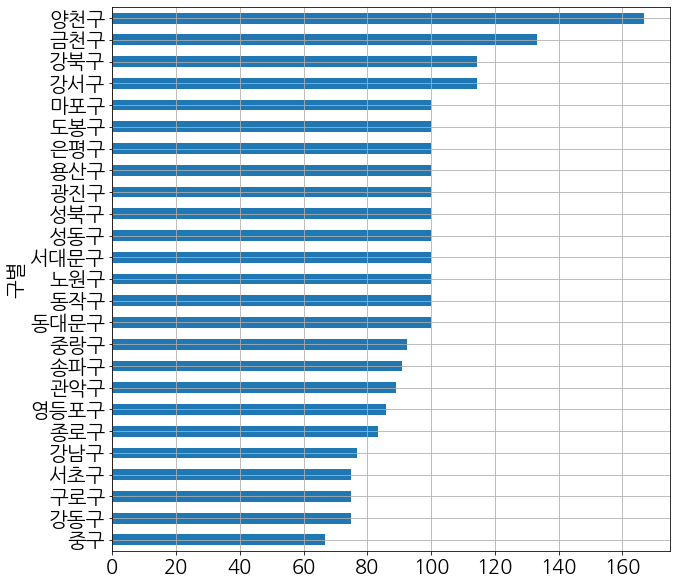

In [310]:
crime_seoul['살인 검거율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
#구별 살인 검거율 순위

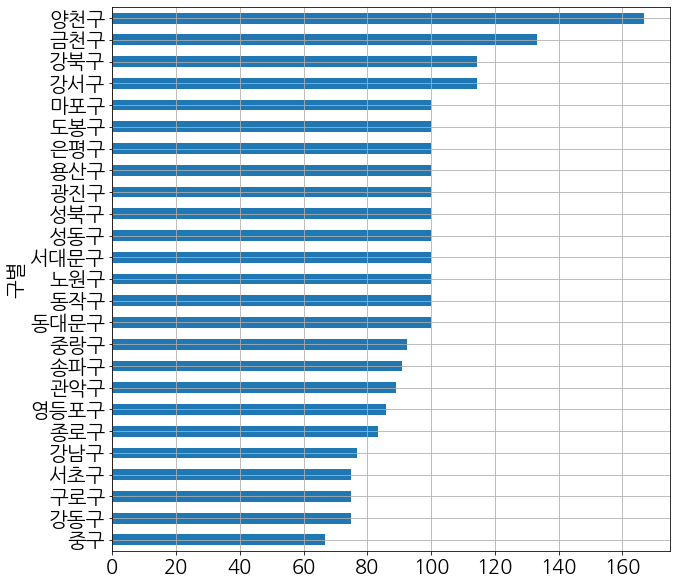

In [311]:
crime_seoul['절도 검거율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
#구별 절도 검거율 순위

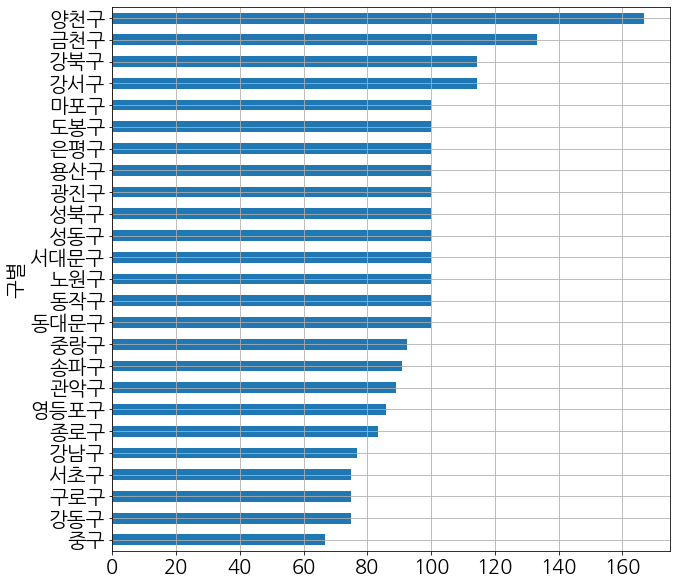

In [312]:
crime_seoul['폭력 검거율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
#구별 폭력 검거율 순위

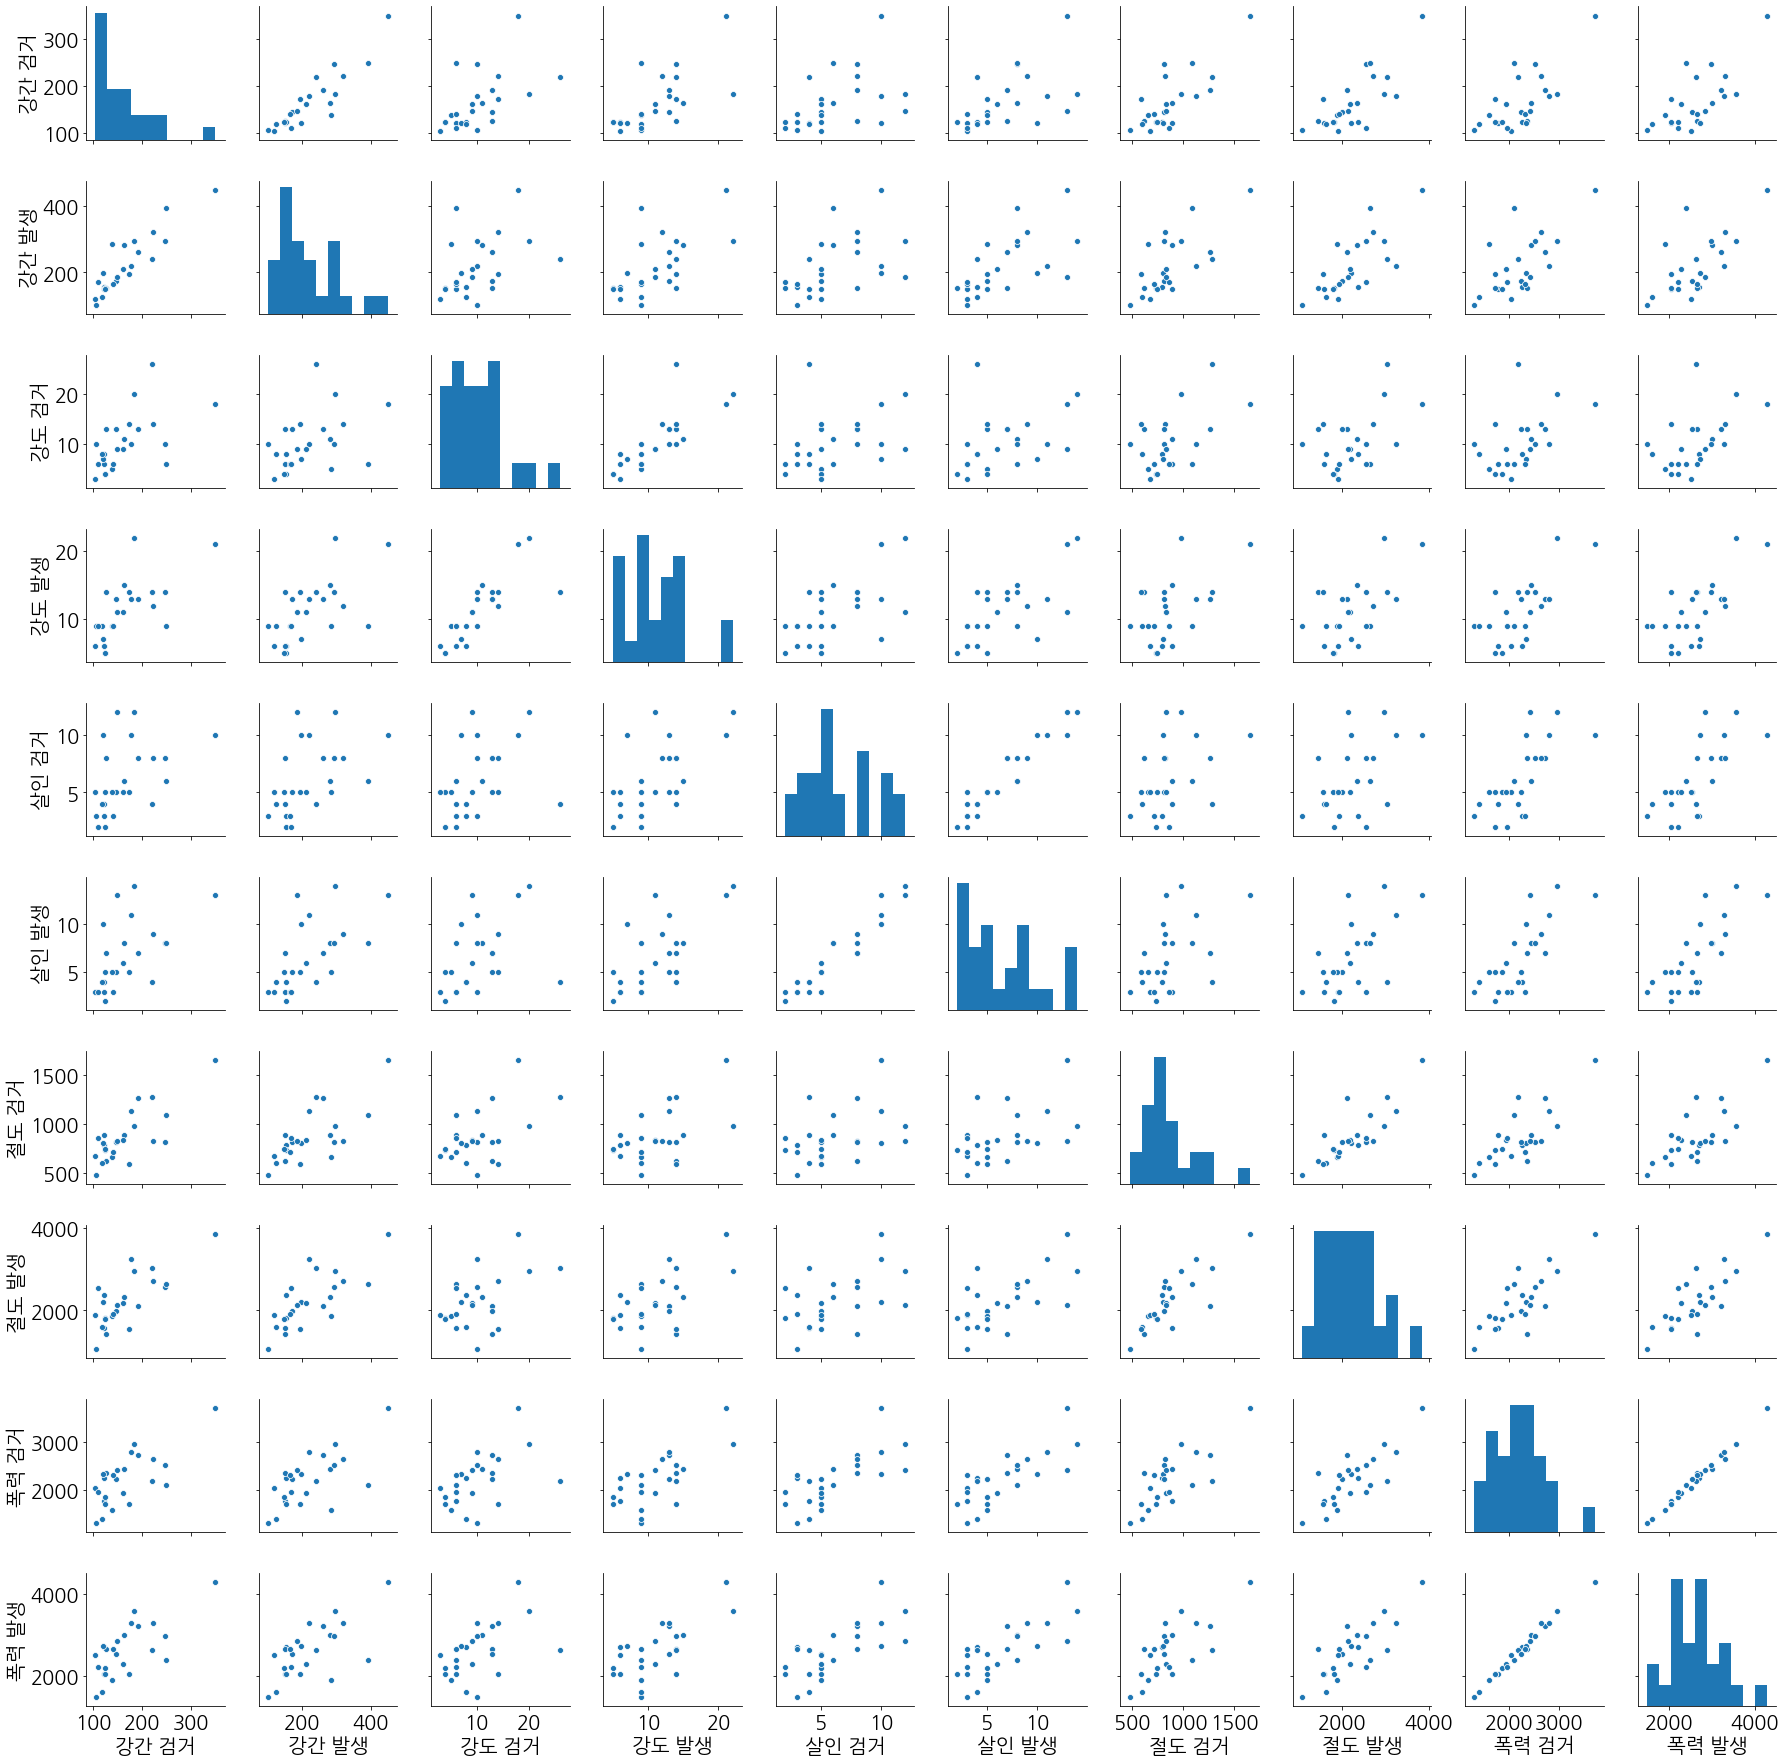

In [313]:
sns.pairplot(crime_seoul[cols])
#각 컬럼간의 산점도 분석

In [314]:
import matplotlib.pyplot as plt

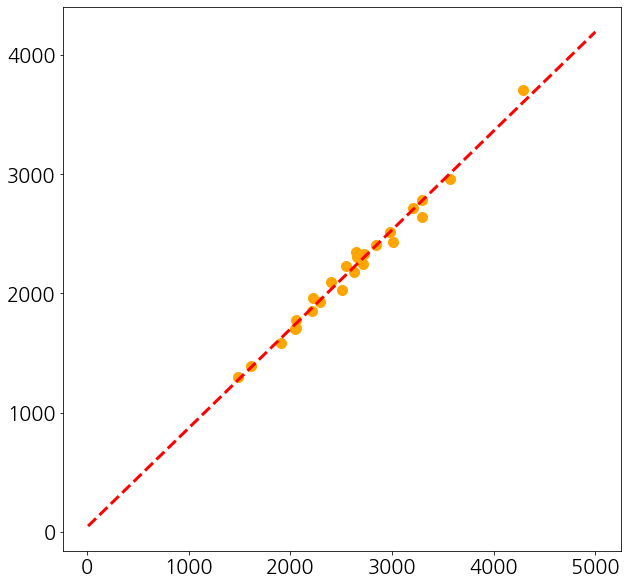

In [315]:
pf1=np.polyfit(crime_seoul['폭력 발생'], crime_seoul['폭력 검거'], 1)
f1=np.poly1d(pf1)
fx=np.linspace(10, 5000, 100)
plt.scatter(crime_seoul['폭력 발생'], crime_seoul['폭력 검거'], s=100, c='orange')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
# 폭력 발생이 증가할수록 폭력 검거율이 높아진다.

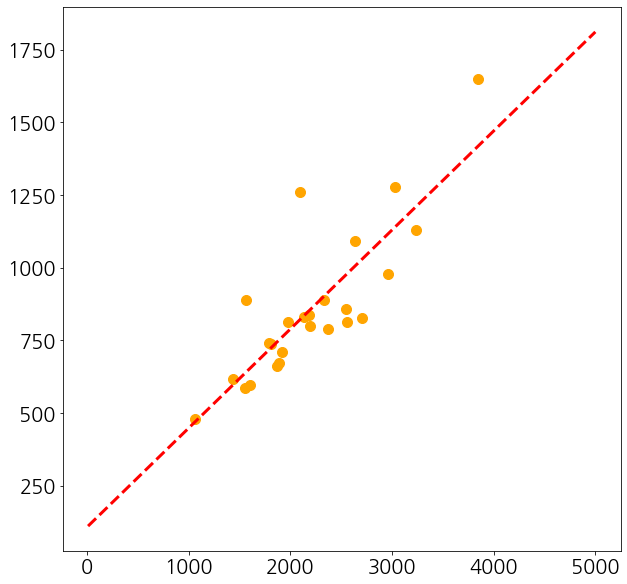

In [316]:
pf1=np.polyfit(crime_seoul['절도 발생'], crime_seoul['절도 검거'], 1)
f1=np.poly1d(pf1)
fx=np.linspace(10, 5000, 100)
plt.scatter(crime_seoul['절도 발생'], crime_seoul['절도 검거'], s=100, c='orange')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
# 절도 발생이 증가할수록 절도 검거율이 높아진다.

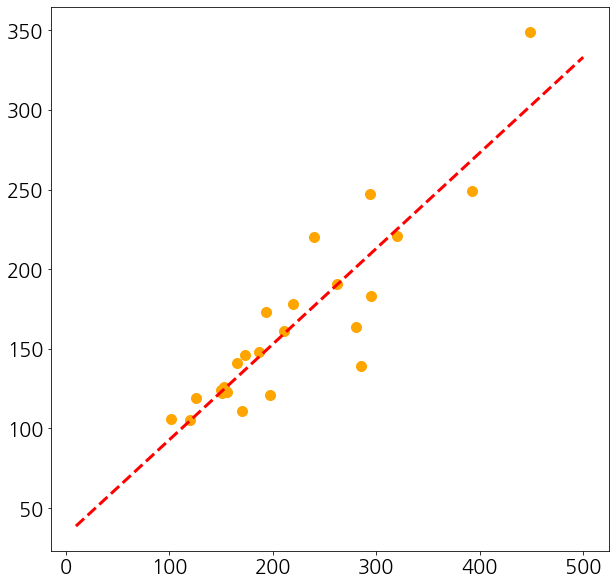

In [317]:
pf1=np.polyfit(crime_seoul['강간 발생'], crime_seoul['강간 검거'], 1)
f1=np.poly1d(pf1)
fx=np.linspace(10, 500, 100)
plt.scatter(crime_seoul['강간 발생'], crime_seoul['강간 검거'], s=100, c='orange')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
# 강간 발생이 증가할수록 강간 검거율이 높아진다.

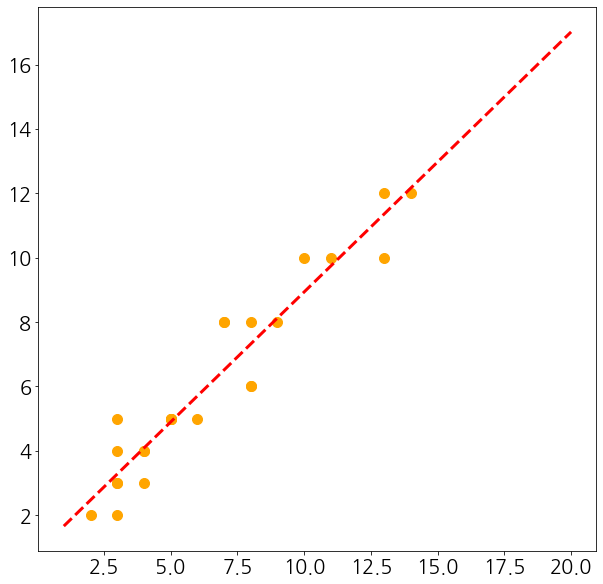

In [318]:
pf1=np.polyfit(crime_seoul['살인 발생'], crime_seoul['살인 검거'], 1)
f1=np.poly1d(pf1)
fx=np.linspace(1, 20, 100)
plt.scatter(crime_seoul['살인 발생'], crime_seoul['살인 검거'], s=100, c='orange')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
# 살인 발생이 증가할수록 살인 검거율이 높아진다.

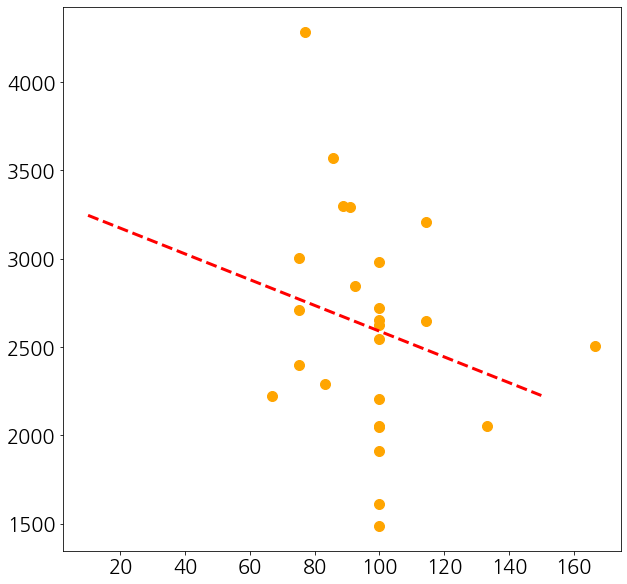

In [319]:
pf1=np.polyfit(crime_seoul['폭력 검거율'], crime_seoul['폭력 발생'], 1)
f1=np.poly1d(pf1)
fx=np.linspace(10, 150, 100)
plt.scatter(crime_seoul['폭력 검거율'], crime_seoul['폭력 발생'], s=100, c='orange')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
# 폭력 검거율이 높아질수록 발생 수는 약간 낮아진다.

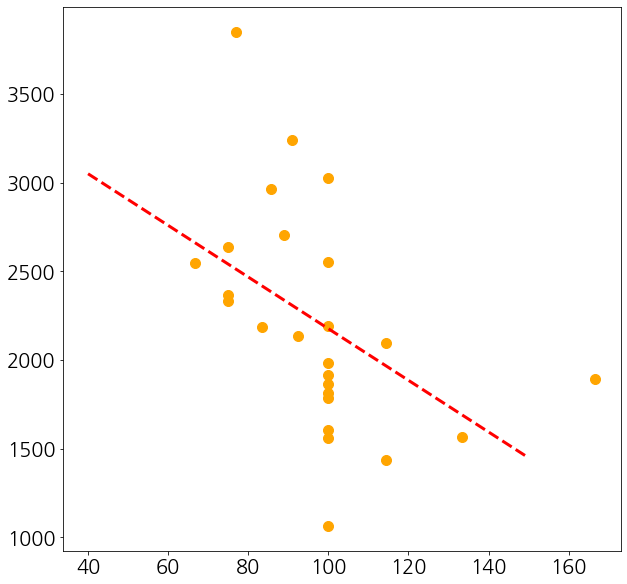

In [320]:
pf1=np.polyfit(crime_seoul['절도 검거율'], crime_seoul['절도 발생'], 1)
f1=np.poly1d(pf1)
fx=np.linspace(40, 150, 100)
plt.scatter(crime_seoul['절도 검거율'], crime_seoul['절도 발생'], s=100, c='orange')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
# 절도 검거율이 높아질수록 발생 수는 낮아진다.

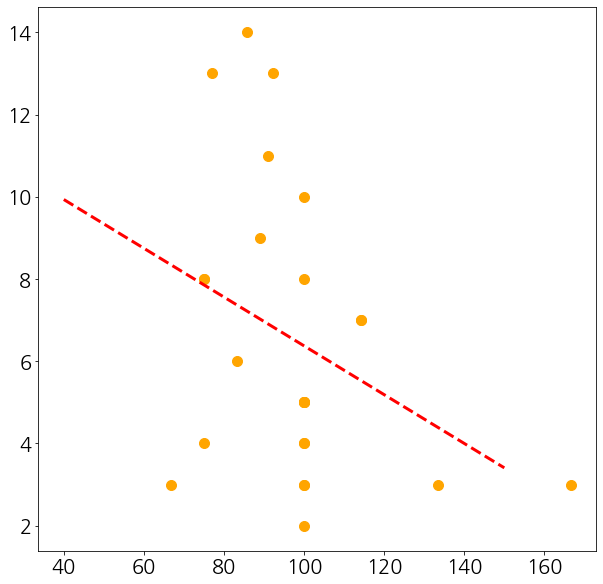

In [321]:
pf1=np.polyfit(crime_seoul['살인 검거율'], crime_seoul['살인 발생'], 1)
f1=np.poly1d(pf1)
fx=np.linspace(40, 150, 100)
plt.scatter(crime_seoul['살인 검거율'], crime_seoul['살인 발생'], s=100, c='orange')
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')
# 살인 검거율이 높아질수록 발생 수는 낮아진다.

In [322]:
crime_seoul['폭력 발생'].sum()

65206

In [323]:
crime_count=[]
crime_count.append(crime_seoul['강간 발생'].sum())
crime_count.append(crime_seoul['강도 발생'].sum())
crime_count.append(crime_seoul['폭력 발생'].sum())
crime_count.append(crime_seoul['절도 발생'].sum())
crime_count.append(crime_seoul['살인 발생'].sum())

In [324]:
index=['강간 발생','강도 발생','폭력 발생','절도 발생','살인 발생']

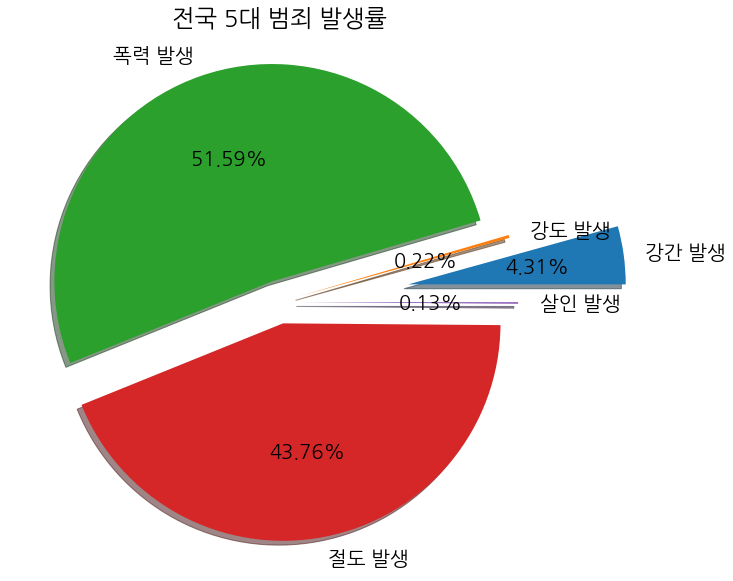

In [325]:
explode = (0.6, 0.1, 0.1, 0.1, 0.1)
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('font', size=20) 
plt.pie(crime_count, explode = explode, labels=index, autopct='%.2f%%', shadow=True)
plt.title('전국 5대 범죄 발생률')
plt.show()